# Demo Home of Bart

# Klassificatie van Homer of Bart

Het hele proces is weergegeven, van het maken en labelen van de data tot het trainen van het model.

1. Afbeeldingen verwerken tot numpy 1D flat pixel arrays
2. Afbeeldingen labelen volgens bestandsnaam
3. Een dicht neuraal netwerk trainen van 2 verborgen relu-lagen en 1 output sigmoid-laag
4. Nauwkeurigheid is ongeveer 72-78%

## pip install

In [ ]:
%pip install numpy tensorflow keras scikit-learn pillow

### Importing libraries

In [ ]:
import os
import numpy as np
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras import Sequential
from PIL import Image

### Example of one image processing 

In [ ]:
# Checking original image nr. 1
dir_path = 'Data'
img_original = Image.open(dir_path + "/bart1.bmp")
display(img_original)

In [ ]:
# Processing image
img = (Image.open(dir_path + "/bart1.bmp")
       .resize((40, 40)))  # 40x40px
display(img)

In [ ]:
# Making it an array 
img_arr = np.array(img) # It creates a 2D array
print(img_arr)
print(img_arr.shape)

In [ ]:
# To make it flat and simplify, as 2D doesn't gain anything
print(img_arr.reshape(-1))

### Iterating and processing all directory

In [ ]:
# Transforming all 
directory = dir_path
all_img_converter = []
y_all = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        # Greyscale and resize
        img = (Image.open(f).resize((100, 100)))  # 40x40px
        
        # Flattening 
        x = np.array(img).reshape(-1)
        all_img_converter.append(x)
        
        # Labelling data 1 = Bart, 0 = Homer
        y = 1
        if "homer" in filename:
            y = 0
        y_all.append(y)

x = np.array(all_img_converter)
y = np.array(y_all)

In [ ]:
print(x.shape)
print(y.shape)

### After crafting the data, let's split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Creating the model



In [ ]:
#model = Sequential([
#    keras.Input(shape=(30000,)),
#    keras.layers.Dense(units=45, activation='relu', kernel_regularizer=keras.regularizers.l1(0.001)),
#    keras.layers.Dense(units=15, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
#    keras.layers.Dense(units=1, activation='sigmoid') 
#])
model = Sequential([
    keras.Input(shape=(30000,)),
    keras.layers.Dense(units=100, activation='relu', kernel_regularizer=keras.regularizers.l1(0.001)),
    keras.layers.Dense(units=30, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(units=1, activation='sigmoid') 
])

model.summary()

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
#model.fit(X_train, y_train, epochs=1000, verbose=0)
model.fit(X_train, y_train, epochs=1000)

### Checking accuracy

In [53]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype("int32")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [54]:
acc = accuracy_score(y_test, predictions)
print("Accuracy:", acc)

Accuracy: 0.6296296296296297


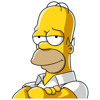

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Homer


In [55]:
# Processing image
img = (Image.open("foto04.jpg")
       .resize((100, 100)))  # 100x100px
display(img)

# Making it an array 
img_arr = np.array(img) # It creates a 2D array
#print(img_arr)
#print(img_arr.shape)

#print(img_arr.reshape(-1))
predictions = model.predict(img_arr.reshape(1, -1))
print("Bart" if predictions > 0.5 else "Homer")
